<h1>Fundamental</h1>
    
1. Data Exploration and Missing Values Finding
2. Numerical Imputation  
3. Categorical Imputation
4. Handling Outliers
5. Bining
6. Data Transformation
7. One Hot Encoding
8. Grouping Operations
9. Feature Split
10. Feature Scaling
11. Extracting Date


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [149]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [150]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [151]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [152]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=True)

In [153]:
data.head(3)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train


<h2>1. Data Exploration and Missing Values</h2>

In [154]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

In [155]:
data.apply(lambda x: sum(x.isnull()), axis=0)

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

In [156]:
threshold = 0.7
check_every_row = sum((data.isnull().mean(axis=1) > threshold).value_counts() == True)
print('number of rows which the percentage of null value bigger than threshold: ', check_every_row, '\n\n')
check_every_col = sum((data.isnull().mean() > threshold).value_counts() == True)
print('number of columns which the percentage of null value bigger than threshold: ', check_every_col, '\n\n')

#Dropping columns with missing value rate higher than threshold
#data = data[data.columns[data.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
#data = data.loc[data.isnull().mean(axis=1) < threshold]

number of rows which the percentage of null value bigger than threshold:  0 


number of columns which the percentage of null value bigger than threshold:  0 




In [157]:
col_list = [x for x in data.columns if data[x].dtypes == 'object' and x not in ['source', 'Loan_ID']]
for x in col_list:
    print(data[x].value_counts(), '\n\n')

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64 


Graduate        763
Not Graduate    218
Name: Education, dtype: int64 


Male      775
Female    182
Name: Gender, dtype: int64 


Y    422
N    192
Name: Loan_Status, dtype: int64 


Yes    631
No     347
Name: Married, dtype: int64 


Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64 


No     807
Yes    119
Name: Self_Employed, dtype: int64 




<h2>2. Numerical Imputation</h2>

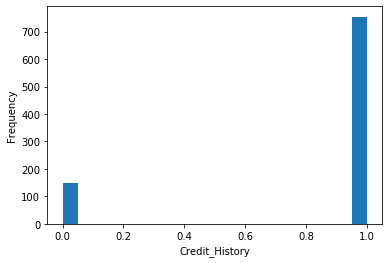

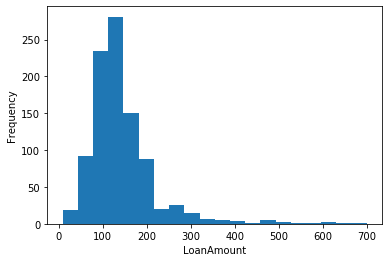

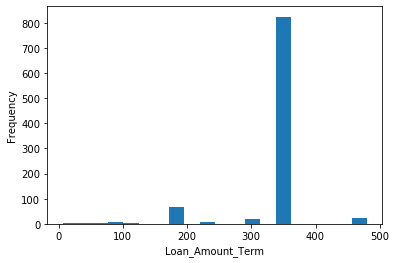

In [158]:
#Credit_History, LoanAmount, Loan_Amount_Term have missing values
num_col = ['Credit_History', 'LoanAmount', 'Loan_Amount_Term']
for x in num_col:
    data[x].plot(kind='hist',bins=20)
    plt.xlabel(x)
    plt.show()

#Filling all missing values with 0
#data = data.fillna(0)
#Filling missing values with medians of the columns
#data = data.fillna(data.median())

In [159]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
print('null value in Credit_History: ', sum(data['Credit_History'].isnull()))

null value in Credit_History:  0


In [160]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
print('null value in LoanAmount: ', sum(data['LoanAmount'].isnull()))

null value in LoanAmount:  0


In [161]:
print('values of Loan_Amount_Term: \n',data['Loan_Amount_Term'].value_counts(), '\n\n')
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
print('null value in Loan_Amount_Term: ', sum(data['Loan_Amount_Term'].isnull()))

values of Loan_Amount_Term: 
 360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64 


null value in Loan_Amount_Term:  0


<h2>3. Categorical Imputation</h2>

In [162]:
#Dependents, Gender, Married, Self_Employed have missing values
data['Gender'].fillna(data['Gender'].value_counts().idxmax(), inplace=True)
print('null values in Gender: ', sum(data['Gender'].isnull()))

null values in Gender:  0


In [163]:
categorical_list = ['Dependents', 'Married', 'Self_Employed']
for x in categorical_list:
    data[x].fillna(data[x].mode()[0], inplace=True)
    print('null values in ', x, ': ', sum(data[x].isnull()), '\n\n')

null values in  Dependents :  0 


null values in  Married :  0 


null values in  Self_Employed :  0 




In [164]:
data.apply(lambda x: sum(x.isnull()), axis=0)

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

<h2>4. Handling Outliers</h2>

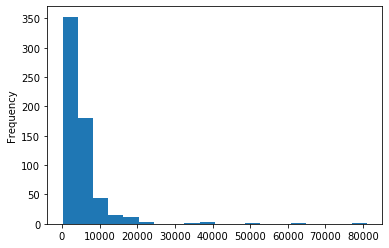

number of outliers whose z-score is bigger than factor:  16


In [165]:
#use Z-score as standard
train['ApplicantIncome'].plot(kind='hist', bins=20)
plt.show()
factor = 2
print('number of outliers whose z-score is bigger than factor: ', sum(abs(stats.zscore(train['ApplicantIncome'])) > factor))

In [166]:
# use IQR as standard
Q1 = train['ApplicantIncome'].quantile(0.25)
Q3 = train['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
outlier_of_col = (train['ApplicantIncome'] < Q1 - 1.5*IQR) | (train['ApplicantIncome'] > Q3 + 1.5*IQR)
print('number of outliers detected by IQR: ', sum(outlier_of_col))

number of outliers detected by IQR:  50


In [167]:
#Capping the outlier rows with Percentiles
column = 'ApplicantIncome'
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
data.loc[(data[column] > upper_lim), column] = upper_lim
data.loc[(data[column] < lower_lim), column] = lower_lim
outlier_of_col = (data[column] < Q1 - 1.5*IQR) | (data[column] > Q3 + 1.5*IQR)
print('number of outliers detected by IQR: ', sum(outlier_of_col))

number of outliers detected by IQR:  0


<h2>5. Bining</h2>

The main motivation of binning is to make the model more robust and prevent overfitting, however, it has a cost to the performance. Every time you bin something, you sacrifice information and make your data more regularized.

For categorical columns, the labels with low frequencies probably affect the robustness of statistical models negatively. Thus, assigning a general category to these less frequent values helps to keep the robustness of the model.

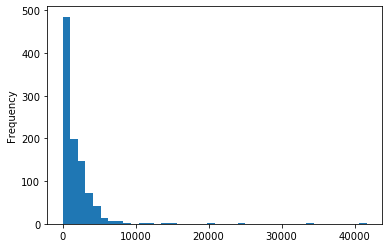

Low       973
Medium      6
High        2
Name: Categorical_CoapplicantIncome, dtype: int64

In [168]:
#numerical example 
data['CoapplicantIncome'].plot(kind='hist', bins=40)
plt.show()
bins = np.linspace(min(data['CoapplicantIncome']), max(data['CoapplicantIncome']), 4)
group_name = ['Low', 'Medium', 'High']
data['Categorical_CoapplicantIncome'] = pd.cut(data['CoapplicantIncome'], bins, labels=group_name, include_lowest=True)
data['Categorical_CoapplicantIncome'].value_counts()

In [169]:
#categorical example
print(data['Property_Area'].value_counts())
group_name = ['Urban', 'Rural']
data['Property_Area_reduced'] = data['Property_Area'].replace({'Semiurban':'Urban'})
print(data['Property_Area_reduced'].value_counts())
data['Property_Area_reduced_1'] = data['Property_Area'].map({'Urban':'Developed', 'Semiurban':'Semi-developed', 'Rural':'Undeveloped'})
print(data['Property_Area_reduced_1'].value_counts())

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
Urban    691
Rural    290
Name: Property_Area_reduced, dtype: int64
Semi-developed    349
Developed         342
Undeveloped       290
Name: Property_Area_reduced_1, dtype: int64


<h2>6. Data Transformation</h2>

1. It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
2. It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust

<b>A critical note:</b> The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transform it. Thus, you ensure the output of the transformation to be positive.

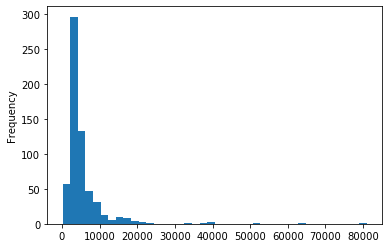

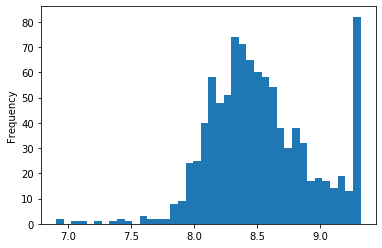

In [170]:
variable_log = 1000
train['ApplicantIncome'].plot(kind='hist', bins=40)
plt.show()
df_transform = np.log(data['ApplicantIncome'] + variable_log)
df_transform.plot(kind='hist', bins=40)

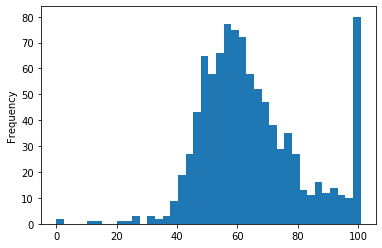

In [171]:
factor = 0.5
df_transform_1 = data['ApplicantIncome']**factor
df_transform_1.plot(kind='hist', bins=40)

<h2>7. One Hot Encoding</h2>

 This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them.
 This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format.

In [172]:
data.drop(columns=['Property_Area_reduced','Property_Area_reduced_1'], inplace=True)
categoriacl_col_list = [x for x in data.columns  if data[x].dtypes == 'object' and x not in ['Loan_ID', 'source']]
data = pd.get_dummies(data, columns=categoriacl_col_list, dtype='int8')
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Loan_ID,source,Categorical_CoapplicantIncome,Dependents_0,Dependents_1,...,Gender_Male,Loan_Status_N,Loan_Status_Y,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,5849.0,0.0,1.0,126.0,360.0,LP001002,train,Low,1,0,...,1,0,1,1,0,0,0,1,1,0
1,4583.0,1508.0,1.0,128.0,360.0,LP001003,train,Low,0,1,...,1,1,0,0,1,1,0,0,1,0
2,3000.0,0.0,1.0,66.0,360.0,LP001005,train,Low,1,0,...,1,0,1,0,1,0,0,1,0,1
3,2583.0,2358.0,1.0,120.0,360.0,LP001006,train,Low,1,0,...,1,0,1,0,1,0,0,1,1,0
4,6000.0,0.0,1.0,141.0,360.0,LP001008,train,Low,1,0,...,1,0,1,1,0,0,0,1,1,0


In [173]:
data.dtypes

ApplicantIncome                   float64
CoapplicantIncome                 float64
Credit_History                    float64
LoanAmount                        float64
Loan_Amount_Term                  float64
Loan_ID                            object
source                             object
Categorical_CoapplicantIncome    category
Dependents_0                         int8
Dependents_1                         int8
Dependents_2                         int8
Dependents_3+                        int8
Education_Graduate                   int8
Education_Not Graduate               int8
Gender_Female                        int8
Gender_Male                          int8
Loan_Status_N                        int8
Loan_Status_Y                        int8
Married_No                           int8
Married_Yes                          int8
Property_Area_Rural                  int8
Property_Area_Semiurban              int8
Property_Area_Urban                  int8
Self_Employed_No                  

<h2>8. Grouping Operations</h2>

1. Categorical Column Grouping
2. Numerical Column Grouping
3. Grouping Rows by Time

In [174]:
data[['LoanAmount', 'Categorical_CoapplicantIncome']].groupby('Categorical_CoapplicantIncome').agg(lambda x: x.value_counts().idxmax()) #x.mode()

,LoanAmount
Categorical_CoapplicantIncome,
Low,126.0
Medium,106.0
High,350.0


In [175]:
data.pivot_table(index='Categorical_CoapplicantIncome', values='LoanAmount', aggfunc=lambda x: x.mode())

,LoanAmount
Categorical_CoapplicantIncome,
Low,126
Medium,"[102.0, 103.0, 106.0, 130.0, 148.0, 239.0]"
High,"[90.0, 350.0]"


In [176]:
data[['LoanAmount', 'Categorical_CoapplicantIncome']].groupby('Categorical_CoapplicantIncome').agg(lambda x: x.count())

,LoanAmount
Categorical_CoapplicantIncome,
Low,973.0
Medium,6.0
High,2.0


In [177]:
group = data.groupby(['Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'])
mean_appincome = group['ApplicantIncome'].mean()
mean_appincome.rename('ApplicantIncome_Mean', inplace=True)

Dependents_0  Dependents_1  Dependents_2  Dependents_3+
0             0             0             1                5295.057692
                            1             0                4695.376562
              1             0             0                4786.318750
1             0             0             0                4272.103509
Name: ApplicantIncome_Mean, dtype: float64

In [178]:
sum_appincome = group['ApplicantIncome'].sum()
sum_appincome.rename('ApplicantIncome_Sum', inplace=True)


Dependents_0  Dependents_1  Dependents_2  Dependents_3+
0             0             0             1                 481850.25
                            1             0                 751260.25
              1             0             0                 765811.00
1             0             0             0                2435099.00
Name: ApplicantIncome_Sum, dtype: float64

In [179]:
mean_sum_appincome = pd.concat([mean_appincome, sum_appincome], axis=1) 
mean_sum_appincome

ApplicantIncome_Mean  \
Dependents_0 Dependents_1 Dependents_2 Dependents_3+                         
0            0            0            1                       5295.057692   
                          1            0                       4695.376562   
             1            0            0                       4786.318750   
1            0            0            0                       4272.103509   

                                                      ApplicantIncome_Sum  
Dependents_0 Dependents_1 Dependents_2 Dependents_3+                       
0            0            0            1                        481850.25  
                          1            0                        751260.25  
             1            0            0                        765811.00  
1            0            0            0                       2435099.00

In [180]:
# Create date range
time_index = pd.date_range('2019/12/15', periods=100000, freq='1Min')
df_time = pd.DataFrame(index=time_index)
# Create column of random values
df_time['Sale_Amount'] = np.random.randint(1, 10, 100000)
df_time

,Sale_Amount
2019-12-15 00:00:00,5
2019-12-15 00:01:00,5
2019-12-15 00:02:00,2
2019-12-15 00:03:00,1
2019-12-15 00:04:00,4
...,...
2020-02-22 10:35:00,8
2020-02-22 10:36:00,3
2020-02-22 10:37:00,4
2020-02-22 10:38:00,5


In [181]:
#df.resample.aggregation_function
df_time.resample('W').sum().head()

,Sale_Amount
2019-12-15,7028
2019-12-22,49865
2019-12-29,50152
2020-01-05,50455
2020-01-12,50418


In [182]:
df_time.resample('M').sum().head()

,Sale_Amount
2019-12-31,121509
2020-01-31,223142
2020-02-29,153823


By default resample returns the label of the right “edge” (the last label) of the time group. We can control this behavior using the <b>label</b> parameter:

In [183]:
df_time.resample('M' , label='left').sum().head()

,Sale_Amount
2019-11-30,121509
2019-12-31,223142
2020-01-31,153823


<h2>9. Feature Split</h2>

In [184]:
name = ['Benson Chen', 'Jason Wang', 'Anderson J. Rose', 'Jeff Chang', 'Terry Lawson']
birthday = ['(1990)-02-05', '(1969)-09-23', '(1954)-11-10', '(1995)-04-04', '(2001)-08-25']
id_emp = ['ID001', 'ID002', 'ID003', 'ID004', 'ID005'] 
dict_emp = {'Name':name, 'Birthday':birthday} 
df_emp = pd.DataFrame(index=id_emp, data=dict_emp)
df_emp.index.set_names('ID', inplace=True)
# df_emp.index.rename('ID', inplace=True)
df_emp

,Name,Birthday
ID,,
ID001,Benson Chen,(1990)-02-05
ID002,Jason Wang,(1969)-09-23
ID003,Anderson J. Rose,(1954)-11-10
ID004,Jeff Chang,(1995)-04-04
ID005,Terry Lawson,(2001)-08-25


In [185]:
df_emp['First_Name'] = df_emp['Name'].str.split(' ').map(lambda x: x[0])
df_emp['Last_Name'] = df_emp['Name'].str.split(' ').map(lambda x: x[-1])
# same as df_emp['First_Name'] = df_emp['Name'].str.split(' ').apply(lambda x: x[0])
df_emp

,Name,Birthday,First_Name,Last_Name
ID,,,,
ID001,Benson Chen,(1990)-02-05,Benson,Chen
ID002,Jason Wang,(1969)-09-23,Jason,Wang
ID003,Anderson J. Rose,(1954)-11-10,Anderson,Rose
ID004,Jeff Chang,(1995)-04-04,Jeff,Chang
ID005,Terry Lawson,(2001)-08-25,Terry,Lawson


In [186]:
df_emp['Birthday_Year'] = df_emp['Birthday'].str.split("(", expand=True)[1].str.split(')', expand=True)[0]
df_emp

,Name,Birthday,First_Name,Last_Name,Birthday_Year
ID,,,,,
ID001,Benson Chen,(1990)-02-05,Benson,Chen,1990
ID002,Jason Wang,(1969)-09-23,Jason,Wang,1969
ID003,Anderson J. Rose,(1954)-11-10,Anderson,Rose,1954
ID004,Jeff Chang,(1995)-04-04,Jeff,Chang,1995
ID005,Terry Lawson,(2001)-08-25,Terry,Lawson,2001


<h2>10. Feature Scaling</h2>

The algorithms based on distance calculations such as <b>k-NN</b> or <b>k-Means</b> need to have scaled continuous features as model input.

In [187]:
#df_income
df_income = data[['ApplicantIncome', 'LoanAmount']]
df_income.head()

,ApplicantIncome,LoanAmount
0,5849.0,126.0
1,4583.0,128.0
2,3000.0,66.0
3,2583.0,120.0
4,6000.0,141.0


In [188]:
#value - value min / value max -  value min
df_income.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0).head()

,ApplicantIncome,LoanAmount
0,0.575052,0.169320
1,0.450584,0.172214
2,0.294949,0.082489
3,0.253951,0.160637
4,0.589898,0.191027


In [189]:
#value -mean / std
df_income.apply(lambda x: (x-x.mean())/x.std(), axis=0).head()

,ApplicantIncome,LoanAmount
0,0.555926,-0.210183
1,0.026394,-0.184004
2,-0.635731,-0.995569
3,-0.810151,-0.288722
4,0.619085,-0.013837


<h2>11. Extracting Date</h2>

In [190]:
from datetime import date

In [191]:
df_date = df_emp[['Birthday']]
df_date

,Birthday
ID,
ID001,(1990)-02-05
ID002,(1969)-09-23
ID003,(1954)-11-10
ID004,(1995)-04-04
ID005,(2001)-08-25


In [192]:
df_date.loc[:, 'Date'] = pd.to_datetime(df_date['Birthday'], format="(%Y)-%m-%d")
df_date

,Birthday,Date
ID,,
ID001,(1990)-02-05,1990-02-05
ID002,(1969)-09-23,1969-09-23
ID003,(1954)-11-10,1954-11-10
ID004,(1995)-04-04,1995-04-04
ID005,(2001)-08-25,2001-08-25


In [193]:
df_date.loc[:, 'Year'] = df_date.loc[:,'Date'].dt.year
df_date.loc[:, 'Month'] = df_date.loc[:,'Date'].dt.month
df_date.loc[:, 'Day'] = df_date.loc[:,'Date'].dt.day
df_date.loc[:, 'Day_of_Week'] = df_date['Date'].dt.day_name()
df_date

,Birthday,Date,Year,Month,Day,Day_of_Week
ID,,,,,,
ID001,(1990)-02-05,1990-02-05,1990,2,5,Monday
ID002,(1969)-09-23,1969-09-23,1969,9,23,Tuesday
ID003,(1954)-11-10,1954-11-10,1954,11,10,Wednesday
ID004,(1995)-04-04,1995-04-04,1995,4,4,Tuesday
ID005,(2001)-08-25,2001-08-25,2001,8,25,Saturday
